In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import pandas as pd
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image_path = '/content/drive/MyDrive/img/test.jpg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [ ]:
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

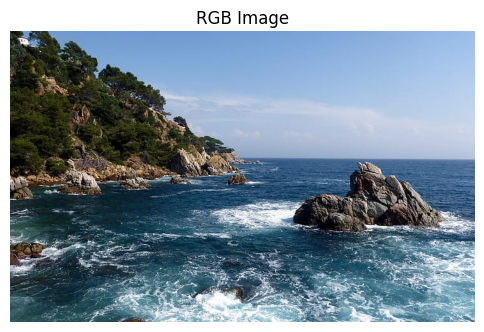

In [ ]:
#Display Image
plt.figure(figsize=(6,6))
plt.imshow(image_rgb)
plt.title('RGB Image')
plt.axis('off')
plt.show()

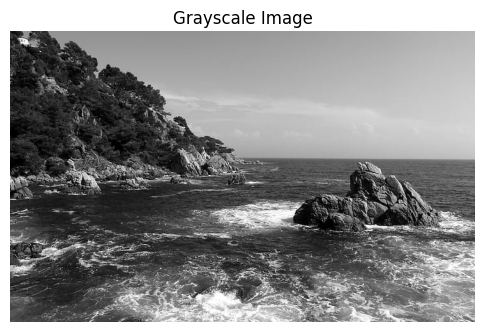

In [ ]:
# Diaplay in grayscale image
plt.figure(figsize=(6,6))
plt.imshow(image_gray, cmap='gray', vmin=0, vmax=255)
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

In [ ]:
def apply_filter(image, kernel):
    image_padded = np.pad(image, ((1,1),(1,1)), mode='constant')
    output = np.zeros_like(image, dtype=np.float32)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            for p in range(kernel.shape[0]):
                for q in range(kernel.shape[1]):
                    output[i,j] += kernel[p,q] * image_padded[i+p, j+q]
    return np.clip(output, 0, 255).astype(np.uint8)


filters = [
    np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) * 1/9,      # Filter 1
    np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) * 1/16,     # Filter 2
    np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]]),           # Filter 3
    np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]]),        # Filter 4
]

Filter 1 kernel:
 [[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


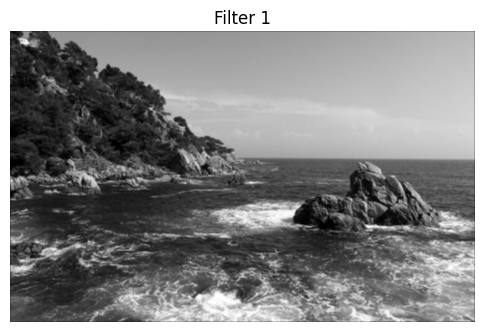

In [ ]:
print("Filter 1 kernel:\n", filters[0])
filtered_1 = apply_filter(image_gray, filters[0])
plt.figure(figsize=(6, 6))
plt.imshow(filtered_1, cmap='gray')
plt.title('Filter 1')
plt.axis('off')
plt.show()

Filter 2 kernel:
 [[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


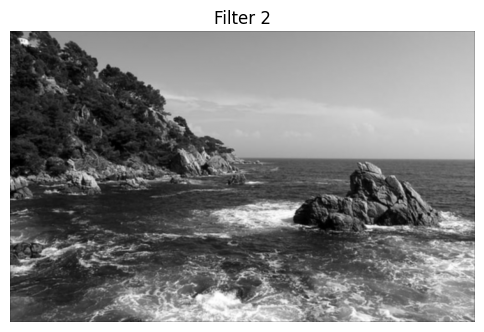

In [ ]:
print("Filter 2 kernel:\n", filters[1])
filtered_2 = apply_filter(image_gray, filters[1])
plt.figure(figsize=(6, 6))
plt.imshow(filtered_2, cmap='gray')
plt.title('Filter 2')
plt.axis('off')
plt.show()

Filter 3 kernel:
 [[ 0  1  0]
 [ 1 -4  1]
 [ 0  1  0]]


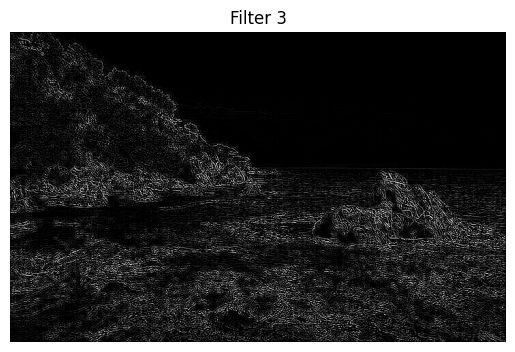

In [ ]:
print("Filter 3 kernel:\n", filters[2])
filtered_3 = apply_filter(image_gray, filters[2])
plt.figure(figsize=(6, 6))
plt.imshow(filtered_3, cmap='gray')
plt.title('Filter 3')
plt.axis('off')
plt.show()

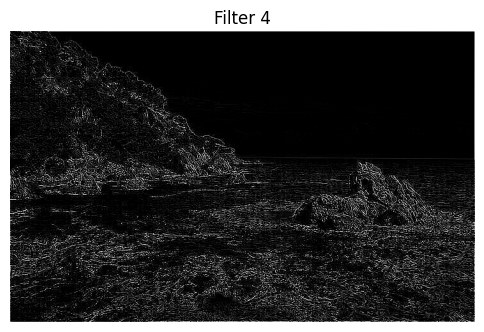

In [ ]:
#print("Filter 4 kernel:\n", filters[3])
filtered_4 = apply_filter(image_gray, filters[3])
plt.figure(figsize=(6, 6))
plt.imshow(filtered_4, cmap='gray')
plt.title('Filter 4')
plt.axis('off')
plt.show()